In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Function to preprocess network data
def preprocess_network_data(data):
    # Standardize the datetime format
    data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
    data.drop(['date', 'time'], axis=1, inplace=True)

    # Encoding categorical variables
    categorical_cols = ['type', 'i/f_name', 'i/f_dir', 'proto', 'appi_name', 'Modbus_Function_Description', 'service']
    data = pd.get_dummies(data, columns=categorical_cols)

    # Normalize numerical features
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    return data

# Function to preprocess process data (privileged information)
def preprocess_process_data(data):
    # Standardize the datetime format
    data[' Timestamp'] = pd.to_datetime(data[' Timestamp'])

    # Normalize numerical features
    scaler = StandardScaler()
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    return data

# Function to merge network and process data
def merge_data(network_data, process_data):
    # Initialize an empty DataFrame for the merged data
    merged_data = pd.DataFrame()

    for _, row in process_data.iterrows():
        # Find network data within one second of the process data timestamp
        start_time = row[' Timestamp']
        end_time = start_time + pd.Timedelta(seconds=1)
        subset_network_data = network_data[(network_data['datetime'] >= start_time) & (network_data['datetime'] < end_time)]

        # Assign process data label to the network data
        for col in process_data.columns:
            if col != ' Timestamp':
                subset_network_data[col] = row[col]

        # Append to the merged data
        merged_data = pd.concat([merged_data, subset_network_data], ignore_index=True)

    return merged_data

network_data = pd.read_csv('/content/drive/MyDrive/2015-12-28_164554_99.log.part01_sorted.csv', low_memory=False)
process_data = pd.read_csv('/content/drive/MyDrive/D2_corrected-1.csv', low_memory=False)

# Preprocess the datasets
network_data_processed = preprocess_network_data(network_data)
process_data_processed = preprocess_process_data(process_data)

# Merge datasets with many-to-one relationship
combined_data = merge_data(network_data_processed, process_data_processed)


<ipython-input-1-1b573b17f416>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_network_data[col] = row[col]
<ipython-input-1-1b573b17f416>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_network_data[col] = row[col]
<ipython-input-1-1b573b17f416>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [2]:
# Print the column names to verify
print(combined_data.columns)

# Correct the column names if necessary

# Drop the columns
# Adjust the column names as per actual DataFrame
columns_to_drop = ['Normal/Attack', 'datetime', ' Timestamp']
columns_to_drop = [col for col in columns_to_drop if col in combined_data.columns]
X = combined_data.drop(columns_to_drop, axis=1)


Index(['num', 'orig', 'src', 'dst', 'proxy_src_ip', 'Modbus_Function_Code',
       'Modbus_Transaction_ID', 'SCADA_Tag', 'Modbus_Value', 's_port', 'Tag',
       'datetime', 'type_alert', 'type_log', 'i/f_name_eth1',
       'i/f_dir_inbound', 'i/f_dir_outbound', 'proto_tcp', 'proto_udp',
       'appi_name_CIP_gen', 'appi_name_CIP_read_tag_service',
       'appi_name_DCE-RPC Protocol', 'appi_name_EtherNet/IP',
       'appi_name_LLMNR Protocol', 'appi_name_NetBIOS Datagram Service',
       'appi_name_NetBIOS Name Service', 'appi_name_OSIsoft PI',
       'appi_name_Unknown Traffic', 'appi_name_Web Browsing',
       'Modbus_Function_Description_Forward Close - Response',
       'Modbus_Function_Description_Read Tag Service',
       'Modbus_Function_Description_Read Tag Service - Response',
       'service_80.0', 'service_135.0', 'service_137.0', 'service_138.0',
       'service_1332.0', 'service_2222.0', 'service_5355.0', 'service_5450.0',
       'service_44818.0', 'LIT101', 'AIT202', 'DPIT

In [3]:
import pandas as pd

# Function to preprocess network data
def preprocess_network_data(data):
    # Combine date and time into a single datetime column
    #data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%d/%m/%Y %H:%M:%S')
    data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%d-%b-%y %H:%M:%S')
    data.drop(['date', 'time'], axis=1, inplace=True)


    return data

# Function to preprocess process data (privileged information)
def preprocess_process_data(data):
    # Trim leading spaces and convert Timestamp to datetime format
    data[' Timestamp'] = data[' Timestamp'].str.strip()  # Remove leading spaces
    data[' Timestamp'] = pd.to_datetime(data[' Timestamp'], format='%d/%m/%Y %I:%M:%S %p')


    return data


# Function to merge network and process data
def merge_data(network_data, process_data):
    merged_data = pd.DataFrame()

    for _, row in process_data.iterrows():
        start_time = row[' Timestamp']
        end_time = start_time + pd.Timedelta(seconds=1)
        subset_network_data = network_data[(network_data['datetime'] >= start_time) & (network_data['datetime'] < end_time)]

        if not subset_network_data.empty:
            temp_process_data = pd.DataFrame([row.to_dict()] * len(subset_network_data))
            temp_combined = pd.concat([subset_network_data.reset_index(drop=True), temp_process_data.reset_index(drop=True)], axis=1)
            merged_data = pd.concat([merged_data, temp_combined], ignore_index=True)

    return merged_data

network_data = pd.read_csv('/content/drive/MyDrive/2015-12-28_164554_99.log.part01_sorted.csv', low_memory=False)
process_data = pd.read_csv('/content/drive/MyDrive/D2_corrected-1.csv', low_memory=False)

# Preprocess the datasets
network_data_processed = preprocess_network_data(network_data)
process_data_processed = preprocess_process_data(process_data)

# Merge datasets with many-to-one relationship
combined_data = merge_data(network_data_processed, process_data_processed)

# Check if the merge was successful
#assert combined_data.shape[0] == process_data_processed.shape[0], "Mismatch after merging data"


In [4]:
# Assuming 'Normal/Attack' is the label column in combined_data
# Adjust the column names as per dataset

# Split into features and labels
X = combined_data.drop(['Normal/Attack'], axis=1)
y = combined_data['Normal/Attack']  # Labels

# has the same index order as combined_data
privileged_info = process_data_processed.drop(['Normal/Attack', ' Timestamp'], axis=1)

In [5]:
# Ensure privileged_info is expanded correctly
repeat_factor = len(combined_data) // len(process_data_processed)
privileged_info_expanded = process_data_processed.loc[process_data_processed.index.repeat(repeat_factor)]

# If the expanded dataset is still smaller, add the missing rows
additional_rows_needed = len(combined_data) - len(privileged_info_expanded)
if additional_rows_needed > 0:
    additional_rows = process_data_processed.iloc[:additional_rows_needed]
    privileged_info_expanded = pd.concat([privileged_info_expanded, additional_rows], ignore_index=True)

assert len(privileged_info_expanded) == len(combined_data), "Mismatch in row count after expansion"


In [6]:
# Split the data into training and testing sets
X_train, X_test, priv_train, priv_test, y_train, y_test = train_test_split(X, privileged_info_expanded, y, test_size=0.2, random_state=42)

# Check if the shapes match
assert X_train.shape[0] == priv_train.shape[0], "Mismatch in training set row count"
assert X_test.shape[0] == priv_test.shape[0], "Mismatch in testing set row count"


In [7]:
# Identify string-type columns
string_columns = X_train.select_dtypes(include=['object']).columns

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[string_columns])
X_test_encoded = encoder.transform(X_test[string_columns])

# Convert encoded features back to DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, index=X_test.index)

# Drop original string-type columns and add encoded columns
X_train = X_train.drop(string_columns, axis=1)
X_test = X_test.drop(string_columns, axis=1)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [10]:
# Convert datetime columns to numeric representation (e.g., timestamp)
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns

for col in datetime_columns:
    X_train[col] = X_train[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)
    X_test[col] = X_test[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)

In [11]:
# Check for NaT values in X_train and X_test
for col in X_train.columns:
    if X_train[col].isna().any():
        print(f"Column {col} in X_train has NaT/NaN values.")

for col in X_test.columns:
    if X_test[col].isna().any():
        print(f"Column {col} in X_test has NaT/NaN values.")

# Option 1: Fill NaT values with a default value (e.g., 0)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Option 2: Drop columns with NaT values
# X_train.dropna(axis=1, inplace=True)
# X_test.dropna(axis=1, inplace=True)

Column Modbus_Function_Code in X_train has NaT/NaN values.
Column Modbus_Transaction_ID in X_train has NaT/NaN values.
Column service in X_train has NaT/NaN values.
Column s_port in X_train has NaT/NaN values.
Column Tag in X_train has NaT/NaN values.
Column Modbus_Function_Code in X_test has NaT/NaN values.
Column Modbus_Transaction_ID in X_test has NaT/NaN values.


In [12]:
# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Identify numeric columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

# Scale only numeric features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [13]:
# Drop non-numeric columns
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=[np.number, 'datetime64']).columns

# Option 1: Drop non-numeric columns
X_train.drop(non_numeric_columns, axis=1, inplace=True)
X_test.drop(non_numeric_columns, axis=1, inplace=True)

# Option 2: Convert non-numeric columns to numeric (e.g., using one-hot encoding)
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# X_train_encoded = encoder.fit_transform(X_train[non_numeric_columns])
# X_test_encoded = encoder.transform(X_test[non_numeric_columns])
# X_train = X_train.drop(non_numeric_columns, axis=1)
# X_test = X_test.drop(non_numeric_columns, axis=1)
# X_train = pd.concat([X_train, pd.DataFrame(X_train_encoded)], axis=1)
# X_test = pd.concat([X_test, pd.DataFrame(X_test_encoded)], axis=1)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Calculate the repeat factor for each row in process_data_processed
repeat_factors = (len(combined_data) // len(process_data_processed)) + 1

# Expand privileged_info to match the number of rows in combined_data
privileged_info_expanded = process_data_processed.loc[process_data_processed.index.repeat(repeat_factors)]

# Truncate privileged_info_expanded to match the exact length of combined_data
privileged_info_expanded = privileged_info_expanded.iloc[:len(combined_data)]


In [17]:
# Convert datetime columns to numeric representation (e.g., timestamp)
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns

for col in datetime_columns:
    X_train[col] = X_train[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)
    X_test[col] = X_test[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)


In [18]:
def preprocess_network_data(data):
    # Standardize the datetime format
    data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
    data.drop(['date', 'time'], axis=1, inplace=True)

    # Encoding categorical variables
    categorical_cols = ['type', 'i/f_name', 'i/f_dir', 'proto', 'appi_name', 'Modbus_Function_Description', 'service']
    data = pd.get_dummies(data, columns=categorical_cols)

    return data

def preprocess_process_data(data):
    # Standardize the datetime format
    data[' Timestamp'] = pd.to_datetime(data[' Timestamp'])

    return data


In [19]:
# Merge datasets with many-to-one relationship
combined_data = merge_data(network_data_processed, process_data_processed)

# Convert datetime columns to numeric representation
datetime_columns = combined_data.select_dtypes(include=['datetime64']).columns
for col in datetime_columns:
    combined_data[col] = combined_data[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)

# Identify and encode string-type columns
string_columns = combined_data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
combined_data_encoded = encoder.fit_transform(combined_data[string_columns])
combined_data_encoded = pd.DataFrame(combined_data_encoded)

# Drop original string-type columns and add encoded columns
combined_data.drop(string_columns, axis=1, inplace=True)
combined_data = pd.concat([combined_data, combined_data_encoded], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Convert datetime columns to timestamps
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    X_train[col] = X_train[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)
    X_test[col] = X_test[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)

# One-hot encode string columns
string_cols = X_train.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[string_cols])
X_test_encoded = encoder.transform(X_test[string_cols])

# Drop original string columns and add encoded columns
X_train = X_train.drop(string_cols, axis=1)
X_test = X_test.drop(string_cols, axis=1)
X_train = pd.concat([X_train, pd.DataFrame(X_train_encoded, index=X_train.index)], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(X_test_encoded, index=X_test.index)], axis=1)

# Impute any remaining missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
print("Is 'Normal/Attack' in network_data?", 'Normal/Attack' in network_data.columns)
print("Is 'Normal/Attack' in process_data?", 'Normal/Attack' in process_data.columns)


Is 'Normal/Attack' in network_data? False
Is 'Normal/Attack' in process_data? True


In [33]:
# Convert datetime columns to numeric representation in privileged data
datetime_columns_priv = priv_train.select_dtypes(include=['datetime64']).columns

for col in datetime_columns_priv:
    priv_train[col] = priv_train[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)
    priv_test[col] = priv_test[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)


In [32]:
# Identify non-numeric columns in privileged information
non_numeric_columns_priv = priv_train.select_dtypes(include=['object']).columns

# Option 1: Drop non-numeric columns
priv_train.drop(non_numeric_columns_priv, axis=1, inplace=True)
priv_test.drop(non_numeric_columns_priv, axis=1, inplace=True)

# Option 2: Convert non-numeric columns to numeric (e.g., using one-hot encoding)
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# priv_train_encoded = encoder.fit_transform(priv_train[non_numeric_columns_priv])
# priv_test_encoded = encoder.transform(priv_test[non_numeric_columns_priv])
# priv_train = pd.concat([priv_train.drop(non_numeric_columns_priv, axis=1), pd.DataFrame(priv_train_encoded)], axis=1)
# priv_test = pd.concat([priv_test.drop(non_numeric_columns_priv, axis=1), pd.DataFrame(priv_test_encoded)], axis=1)


In [38]:
priv_scaler = StandardScaler()
priv_train_scaled = priv_scaler.fit_transform(priv_train)
priv_test_scaled = priv_scaler.transform(priv_test)


In [43]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # also use 'median' or 'constant'

# Apply imputation to the privileged data
priv_train_scaled = imputer.fit_transform(priv_train_scaled)
priv_test_scaled = imputer.transform(priv_test_scaled)


In [48]:
# Convert to DataFrame for easier handling
priv_train_scaled_df = pd.DataFrame(priv_train_scaled)
priv_test_scaled_df = pd.DataFrame(priv_test_scaled)

# Drop rows with NaN values
priv_train_scaled_df.dropna(inplace=True)
priv_test_scaled_df.dropna(inplace=True)

# Convert back to NumPy arrays if necessary
priv_train_scaled = priv_train_scaled_df.to_numpy()
priv_test_scaled = priv_test_scaled_df.to_numpy()


In [54]:
priv_model = SVC(probability=True)
priv_model.fit(priv_train_scaled, y_train)

priv_train_features = priv_model.predict_proba(priv_train_scaled)
priv_test_features = priv_model.predict_proba(priv_test_scaled)


In [59]:
# Ensure privileged_info is expanded correctly
repeat_factor = len(combined_data) // len(process_data_processed)
privileged_info_expanded = process_data_processed.loc[process_data_processed.index.repeat(repeat_factor)]

# If the expanded dataset is still smaller, add the missing rows
additional_rows_needed = len(combined_data) - len(privileged_info_expanded)
if additional_rows_needed > 0:
    additional_rows = process_data_processed.iloc[:additional_rows_needed]
    privileged_info_expanded = pd.concat([privileged_info_expanded, additional_rows], ignore_index=True)

assert len(privileged_info_expanded) == len(combined_data), "Mismatch in row count after expansion"

In [64]:
# Split the data into training and testing sets
X_train, X_test, priv_train, priv_test, y_train, y_test = train_test_split(X, privileged_info_expanded, y, test_size=0.2, random_state=42)

# Check if the shapes match
assert X_train.shape[0] == priv_train.shape[0], "Mismatch in training set row count"
assert X_test.shape[0] == priv_test.shape[0], "Mismatch in testing set row count"

In [72]:
# Identify string-type columns
string_columns = X_train.select_dtypes(include=['object']).columns

In [73]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[string_columns])
X_test_encoded = encoder.transform(X_test[string_columns])

# Convert encoded features back to DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, index=X_test.index)

# Drop original string-type columns and add encoded columns
X_train = X_train.drop(string_columns, axis=1)
X_test = X_test.drop(string_columns, axis=1)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [77]:
# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [82]:
# Convert datetime columns to numeric representation (e.g., timestamp)
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns

for col in datetime_columns:
    X_train[col] = X_train[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)
    X_test[col] = X_test[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)

In [85]:
main_model = SVC(probability=True)
main_model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = main_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9999266915915256


Accuracy: 0.9999266915915256

Classification Report:
               precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     12421
      Normal       1.00      1.00      1.00      1220

    accuracy                           1.00     13641
   macro avg       1.00      1.00      1.00     13641
weighted avg       1.00      1.00      1.00     13641


Confusion Matrix:
 [[12421     0]
 [    1  1219]]


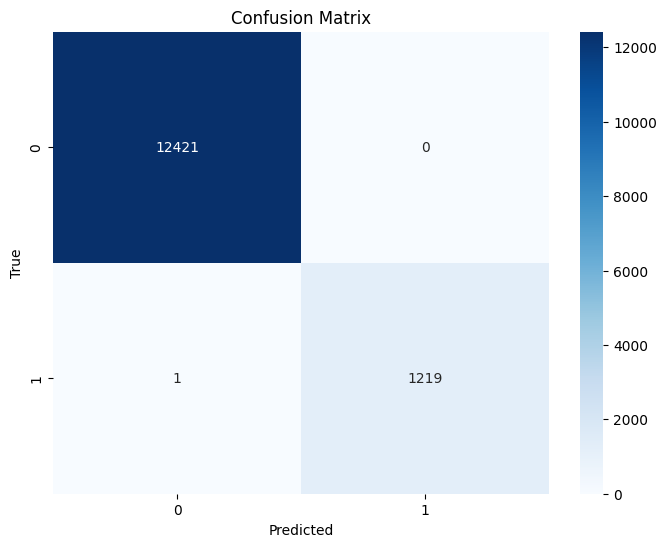

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = main_model.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report for precision, recall, f1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
=